In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import scipy.stats as stats

# Операция "вспомнить всё"

# 0. 
Вспомним, как создавать генераторы распределений, находить значение функции распределения в точке и плотности распределения на интервале.

## 0.1 
* Импортируйте numpy и установите сид для воспроизводимости случайной генерации (`np.random.seed(123)`)
* Импортируйте генератор для нормального распределения из `scipy.stats`;
* Создайте выборку из нормального распределения со средним 100 и дисперсией 169 (в питоне указывается стандартное отклонение) размерности (10, 10000);
* Таким образом, вы создатите матрицу 10х10000. С ней можно работать как с 10000 выборок по 10 чисел в каждой;
* Посчитайте среднее и дисперсию для всей матрицы, они не должны почти отличаться от заданных.

In [2]:
np.random.seed(123)
samples = stats.norm(loc=100, scale=13).rvs((10, 10000))
samples.mean(), samples.var()

(100.01709266227692, 168.85475102903217)

## 0.2
Построим распределения для выборочного среднего, дисперсии и стандартного отклонения.<br>
С выборочным средним всё просто -- оно асимптотически распределено нормально по ЦПТ.<br>
С выборочной дисперсией тоже можно справиться, это <a href="https://online.stat.psu.edu/stat414/lesson/26/26.3">Хи-квадрат распределенная</a> величина.<br>
Выборочное стандартное отклонение -- монстр посложнее. Можете посмотреть <a href="https://mathworld.wolfram.com/StandardDeviationDistribution.html">тут. Но распределение выводится из Хи-квадрата и на него собственно похоже.</a>

Построим картинки.

* Посчитайте среднее для каждой выборки (нужно указать axis) (получится 10000 средних)  и нарисуйте распределение среднего (например через `plt.hist`,  поиграйте со значением параметра `bins`);
* Аналогично постройте картинки для выборочной дисперсии и стандартного отклонения.

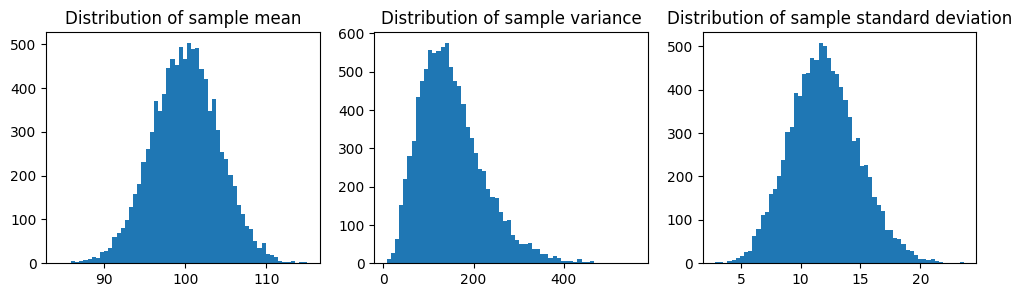

In [3]:
fig, axs = plt.subplots(1, 3, figsize=(12, 3))

axs[0].hist(samples.mean(axis=0), bins=60)
axs[0].set_title("Distribution of sample mean")
axs[1].hist(samples.var(axis=0), bins=60)
axs[1].set_title("Distribution of sample variance")
axs[2].hist(samples.std(axis=0), bins=60)
axs[2].set_title("Distribution of sample standard deviation")
plt.show()

## 0.3
* Стандартизуйте вектор с выборочными средними из предыдущего задания (вычтите среднее этого вектора, поделите на стандартное отклонение этого вектора с ddof=1);
* Проверьте, что теперь среднее равно почти равно 0, а стандартное отклонение почти равно 1.

In [4]:
means_ = samples.mean(axis=0)
means_scaled = (means_ - means_.mean()) / means_.std(ddof=1)
means_scaled.mean(), means_scaled.std()

(-8.324008149429574e-16, 0.9999499987499374)

## 0.4
Выборочное среднее распределено асимптотически нормально.<br>
1. Мы сделали генератор нормального распределния со средним 100 и стандартным отклонением 13 (дисперсия 169).
2. Мы получили вектор из 10000 выборочных средних, но каждое из них посчитано на очень маленькой выборке -- всего 10 точек. Поэтому, скорее всего, мы не совсем точно каждый раз оценили среднее.
3. Такая симуляция позволяет нам в явном виде построить распределение для выборочного среднего. Но сделать такое мы могли бы и теоретически, ведь знаем, как выборочное среднее распределено и каким законом распределения его можно моделировать (t-распределением, если мало образом).
4. Проверим, насколько наше эмпирическое распределение выборочного среднего (10000 выборочных средних, каждое из которых посчитано на 10 точках) подчиняется теоретическому нормальному.

----

1. Выборочное среднее распределено $\mathcal{N}(\mu, \frac{\sigma^2}{n})$. Поскольку мы оракул и знаем параметры генеральной совокупности (100 и стд 13), то мы знаем, что выборочное среднее распределено как $\mathcal{N}(100, 16.9)$ ($std=\sqrt{16.9}\approx 4.11$). 
2. Создайте генератор  нормального распределния с такими параметрами и посчитайте его квантили уровня от 0.05 до 0.95 с шагом 0.05, включая оба конца;
3. Посчитайте квантили такого же уровня для эмпирического распределения;
4. Постройте диаграмму рассеяния (scatterplot) одних квантилей против других;
5. Добавьте диагональ (прямую из точки (93, 93) в точку (106, 106)).

In [5]:
q_levels = np.arange(0.05, 0.95, 0.05)
equantiles = np.quantile(means_, q_levels)
equantiles

array([ 93.24399072,  94.77181146,  95.74638071,  96.51181047,
        97.22785044,  97.86345696,  98.42387897,  98.9878572 ,
        99.50201381, 100.05105872, 100.57760138, 101.09068925,
       101.61455563, 102.16919726, 102.77837837, 103.49402388,
       104.27803218, 105.29832931])

In [6]:
true_quantiles = stats.norm(loc=100, scale=np.sqrt(16.9)).ppf(q_levels)
true_quantiles

array([ 93.23807096,  94.73159155,  95.7392628 ,  96.54012797,
        97.22719897,  97.84420997,  98.41596261,  98.95849995,
        99.48341111, 100.        , 100.51658889, 101.04150005,
       101.58403739, 102.15579003, 102.77280103, 103.45987203,
       104.2607372 , 105.26840845])

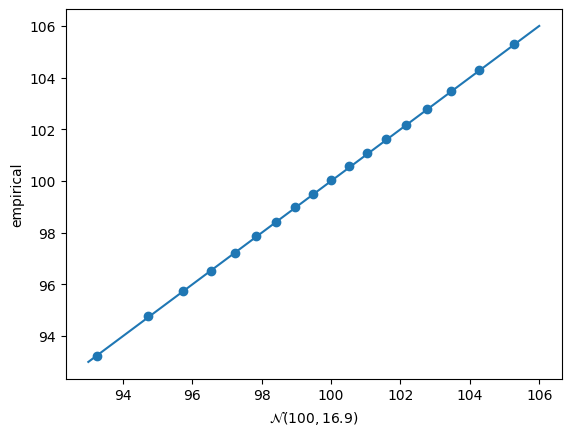

In [7]:
plt.scatter(true_quantiles, equantiles)
plt.ylabel('empirical')
plt.xlabel('$\mathcal{N}(100, 16.9)$')
plt.plot([93, 106], [93, 106])
plt.show()

Что мы видим на картинке?<br>

Видим, что наши точки идеально ложатся на теоретические квантили. Что действительно выборочное среднее подчинено такому закону распределения.<br>
**Ура-ура, мы опять увидели ЦПТ в действии :D**

# Повторение процедуры проверки стат гипотез
* 1. Формулируем нулевую гипотезу;
  2. Формулируем альтернативу;
  3. Устсанавливает уровень значимости $\alpha$ (т.е. порог по _p_-value);
  4. Выбираем стат. тест;
  5. \*Иногда нужно проверять, выполняются ли допущения теста, но обычно мы просто знаем что-то о данных или предполагаем что-то и поэтому не проверяем условия для проведения теста;
  6. Проводим стат. тест и получаем статистику;
  7. С помощью тестовой статистики может посчитать _p_-value;
  8. Если _p_-value меньше установленного ранее порога, значит при верности нулевой гипотезы видеть такую же тестовую статистику или более экстремальную достаточно **маловероятно**. Поэтому мы отвергаем нулевую гипотезу;
  9. Если _p_-value больше порога, то мы остаётся при нулевой гипотезе.
<img src="./data/pics/test.webp"/>

# 1. Пример.
В одном ларьке мы торгуем только кукурузой, а в другом -- только сладкой ватой. Мы предполагаем, что средний  в ларьке со сладкой ватой больше, чем в ларьке с кукурузой. Давайте проверим наше предположение.<br>

То есть мы хотим проверить нулоевую гипотезу о равенстве средних чеков. Альтернативу будем рассматривать одностороннюю: средний чек в ларьке с кукурузой меньше, чем в ларьке со сладкой ватой. 

Проверить гипотезу о равенстве средних можно с помощью z-теста или t-теста.
* Оба теста требуют, что данные взяты случайно из нормального распределения.
Будем считать, что средние чеки независимы друг от друга. А так как это средние, то мы можем говорить о нормальности, ведь выборочное среднее асимптотически распределено нормально по ЦПТ. Можно проверить, насколько сильно наша выборка нормальна, построив QQ plot или выполнив отделньо тест (проверку нормальности тестом стоит делать только на малых выборках).
* Для z-теста нам нужно знать дисперсию генеральной совокупности. Если дисперсия неизвестна, а размер выборки больше 30, то мы можем оценить дисперсию по выборке и всё равно использовать z-тест, так как верим, что размер выборчки достаточно большой, чтобы наша оценка была состоятельной.  
* Если дисперсия генеральной совокупности нам неизвестна, а размер выборке меньше 30, то используем t-тест, потому что он помогает "дооценить" дисперсию. 

Есть данные лишь для трёх недель. Размеры выборок малы, а дисперсия генеральной совокупности нам неизвестна.<br>
Поэтому будем пользоваться двувыборочным t-тестом (сравниваем средние двух групп, а не одной группы и константы).

$H_0: \mu_1=\mu_2$<br>
$H_a: \mu_1\lt\mu_2$<br>
$\alpha = 0.05$

## 1.1 EDA

### 1.1.1
Прочитайте данные о средних чеках из файла `data/21days_sales.tsv`. Разделитель -- знак табуляции.<br>
В таблице сохранены средние чеки двух точек по продаже кукурузы и одной -- сладкой ваты. Пока отложим чеки "Кукуруза2", они понадобятся нам в других заданиях.

In [8]:
# читаем файл
df = pd.read_csv("./data/21days_sales.tsv", sep='\t')
df.head()

,Кукуруза,Сладкая_вата,Кукуруза2
0,279,327,174
1,382,240,274
2,325,267,257
3,254,357,515
4,302,274,380


### 1.1.2
* Оставьте только два столбца: "Кукуруза" и "Саладкая_вата";
* Переведите данные в длинный формат (`melt`) и сохраните в отдельную переменную;
* Переименуйте столбцы в "тип_товара" и "средний_чек";
* Выведите первые 5 строк длинного датафрейма;
* Выведите последние 5 строк длинного датафрейма.

In [9]:
# переводим в длинный формат, выводим первые 5 строк
df_long = df.iloc[:, :-1].melt()
df_long.columns = ['тип_товара', 'средний_чек']
df_long.head()

,тип_товара,средний_чек
0,Кукуруза,279
1,Кукуруза,382
2,Кукуруза,325
3,Кукуруза,254
4,Кукуруза,302


In [10]:
# выводим последние 5 строк
df_long.tail()

,тип_товара,средний_чек
37,Сладкая_вата,334
38,Сладкая_вата,311
39,Сладкая_вата,393
40,Сладкая_вата,340
41,Сладкая_вата,323


# 1.1.3
* Постройте kde-plot для распределение среднего чека отдельно для каждлого типа товара (`sns.kdeplot`).<br>
Вообще, картинку можно нарисовать и с помощью широкого датафрейма, попробуйте :)

\*Напоминаю про параметр `common_norm=False`, который по умолчанию равен True. В данном случае это не влияет, так как число наблюдений для каждого типа товара одно и то же. Но если бы было разное, то тогда бы этот параметр влиял бы на относительный размер распределений. Обычно мы хотим рисовать распределения независимо.

<Axes: xlabel='средний_чек', ylabel='Density'>

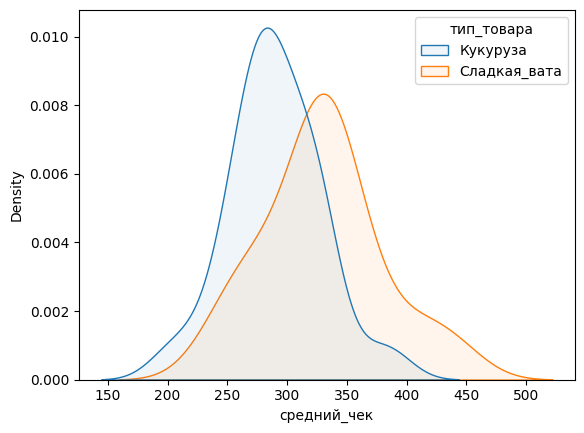

In [11]:
# строим картинку
sns.kdeplot(data=df_long, x='средний_чек', hue='тип_товара', common_norm=False, fill=True, alpha=0.07)

По картинке с плотностью распределения можно предположить, что средний средний чек у точки со сладкой ватой больше, чем у точки с кукурузой. **Проверим наше предположение с помощью стат. процедуры**.

## 1.2

### 1.2.1
Предположим, что у нас есть какие-то доменные зннания, на основании которых мы предполагаем одинаковую дисперсию среднего чего в наших точках. Например, они расположены в одном и том же парке и у всех точек в этом парке одинаковая дисперсия среднего чека (не только у наших).

При этом дисперсию мы не знаем. Значит нам нужно оценить дисперсию по выборке.<br>
Так как мы верим, что дисперсия одинаковая, то можно оценить её, объединив средние чеки. Тогда размер выборки для оценки дисперсии уже равен 42, то есть можно было бы и на z-тест перескочить :)

_Почему можно было бы использовать z-тест:<br>
Отличие t-теста и z-теста в конечном итоге состоит в используемом распределении для подсчета _p_-value. Если мы предполагаем, что дисперсии выборок равны, то тогда используется t-распределение с $N_2+N_1-2$ степенями свободы. В нашем случае это $21+21-2=40$ степенй свободы, а такое распределение уже очень похоже на z-распределение (стандартное нормальное)._

---
* Импортируйте `scipy.stats`;
* Используйте двувыборочный t-тест с помощью `ttest_ind`. Передайте тесту две выборки, укажите, что дисперсии равны, выберите правильюную альтернативу (что средний чек точки с кукурузой меньше).
* На основании полученного _p_-сделайте вывод и принятии или отвержении нулевой гипотезы.

In [12]:
res = stats.ttest_ind(
    df['Кукуруза'],
    df['Сладкая_вата'],
    equal_var=True,
    alternative='less'
)
res

TtestResult(statistic=-2.8959510964832362, pvalue=0.0030498302992849986, df=40.0)

In [13]:
if res.pvalue < 0.05:
    print('Reject. Средний чек в кукурузе стат значимо меньше.')
else:
    print('Confirm. Средней чек в кукурузе такой же, как в сладкой вате.')

Reject. Средний чек в кукурузе стат значимо меньше.


## 1.3
Мы выяснили, что средний чек точки со сладкой ватой выше. Давайте теперь сравним две точки с кукурузой между собой.<br>
Вторая точка с кукурузой находится в другом месте (не в том же парке), так что мы не предполагаем равенство дисперсий. А значит будет использовать <a href="https://ru.wikipedia.org/wiki/T-%D0%BA%D1%80%D0%B8%D1%82%D0%B5%D1%80%D0%B8%D0%B9_%D0%A3%D1%8D%D0%BB%D1%87%D0%B0">t-тест Уэлча</a>.<br>Он не предпоалагет равенство дисперсий и считается приближенное значение степеней свободы. Поэтому число степеней свободы получается меньше -> более толстые хвосты распределения -> мы лучше дооцениваем дисперсию.

----
* Запустите двувыборочный t-тест для точек "Кукуруза" и "Кукуруза2". Предполагаем, что вторая точка должна иметь бОльший средний чек, так как в ней кроме кукурузы ещё продаются напитки.
* Не забудьте указать правильную альтернативу и что у выборок разная дисперсия.
* Запустите тот же тест, но укажите, что дисперсия одинаковая. Что как поменялось число степеней свободны? P-value? Изменился ли наш вывод на 0.05 уровне значимости?

In [14]:
res = stats.ttest_ind(
    df['Кукуруза'],
    df['Кукуруза2'],
    equal_var=False,
    alternative='less'
)
res

TtestResult(statistic=-1.6920272869567674, pvalue=0.051265063526472955, df=26.1388324052737)

In [15]:
res = stats.ttest_ind(
    df['Кукуруза'],
    df['Кукуруза2'],
    equal_var=True,
    alternative='less'
)
res

TtestResult(statistic=-1.6920272869567672, pvalue=0.049209011002526275, df=40.0)

Тест Уэлча покажет бОльшее _p_-value, так как для его подсчета используется t-распределение с меньшим числом степеней свободы, а значит более толстыми хвостами. 
Вообще, разница между _p_-value незначительная и особо не решает. Принятие решений по порогу не решаем ничего для одного случая, а играет роль на дистанции. Поэтому если в одном случае мы получается _p_-value 0.051, а в другом 0.49, то это лишь говорит о том, что, возможно, следует собирать больше наблюдений :) Но на дистанции важно соблюдать процедуру, чтобы асиптотически ошибаться не чаще, чем в $\alpha$ случаев.

## 1.4
Давайте проверим, является ли средний чек точки "Кукуруза2" более волатильным, чем средний чек точки "Кукуруза".<br>
Мы можем сделать с помощью F-теста. Его допущения такие же, как у t-теста: данные случайно взяты из нормального распределния, две выборки независимы.

К сожалению, F-тест не реализован в scipy, но это не особо страшно, он легко и быстро проводится.

----
Пусть есть две независимо полученные выборки из нормальных распределений (или одного). Отношение выборочных дисперсий имеет F-распределение с параметрами (m-1, n-1), где m, n -- размеры выборок. 

Значит нам нужно посчитать выборочные дисперсии, найти их отношение дисперсий, посчитать "размер" экстремального хвоста.

* Посчитайте выборочную дисперсию для точек "Кукуруза" и "Кукуруза2" (используйте n-1 в знаменателе);
* Найдите отношение дисперсии Кукуруза2 к Кукуруза 

In [16]:
Fstat = df['Кукуруза2'].std(ddof=1) / df['Кукуруза'].std(ddof=1) 
m = n = 21
print(Fstat)
p_value = 1 - stats.f.cdf(Fstat, m-1, n-1)
print(p_value)

2.521632504464402
0.022312663335310567


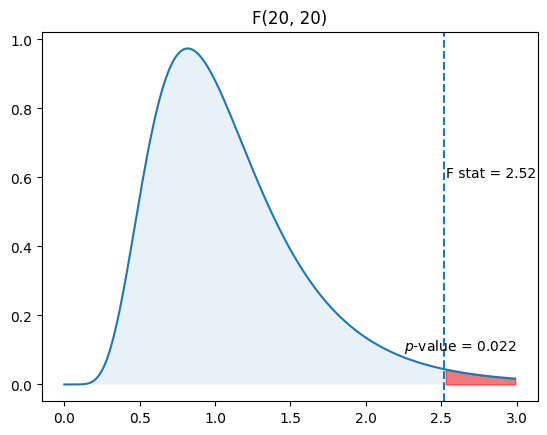

In [17]:
x = np.arange(0, 3, 0.01)
y = stats.f.pdf(x, 20, 20)
plt.plot(x, y)
plt.fill_between(x, 0, y, alpha=0.1)
mask = x > 2.52
plt.fill_between(x[mask], 0, y[mask], alpha=0.5, color='red')
plt.text(2.25, 0.1, '$p$-value = 0.022')
plt.title("F(20, 20)")
plt.axvline(2.52, linestyle='--')
plt.text(2.53, 0.6, 'F stat = 2.52')
plt.show()